In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
df.shape

(891, 4)

In [6]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

### let's check the mean of the missing value 
- age have 19% null values
- fare have 5% null values

In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
x = df.iloc[:,:3]
y = df['Survived']
x.head()

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=4)

### Let's fill the null values with means and median 

In [10]:
df['mean_Age']  = df['Age'].fillna(df['Age'].mean())
df['medain_Age']  = df['Age'].fillna(df['Age'].median())

df['mean_Fare']  = df['Fare'].fillna(df['Fare'].mean())
df['medain_Fare']  = df['Fare'].fillna(df['Fare'].mean())

In [11]:
x_train['mean_Age']  = x_train['Age'].fillna(df['Age'].mean())
x_train['medain_Age']  = x_train['Age'].fillna(df['Age'].median())

x_train['mean_Fare']  = x_train['Age'].fillna(df['Fare'].mean())
x_train['medain_Fare']  = x_train['Age'].fillna(df['Fare'].median())

In [12]:
df.head()

,Age,Fare,Family,Survived,mean_Age,medain_Age,mean_Fare,medain_Fare
0,22.0,7.2500,1,0,22.0,22.0,7.2500,7.2500
1,38.0,71.2833,1,1,38.0,38.0,71.2833,71.2833
2,26.0,7.9250,0,1,26.0,26.0,7.9250,7.9250
3,35.0,53.1000,1,1,35.0,35.0,53.1000,53.1000
4,35.0,8.0500,0,0,35.0,35.0,8.0500,8.0500


### Let's check for the variance 
## Variance actually decribe the difference or distance from mean 
- if there is more change in variance than we avoid to fill null with mean and median
- if there is just slight change, than we're good to go 

In [13]:
df['Age'].var()

211.0191247463081

In [14]:
print('Original Age variable variance: ', df['Age'].var())
print('Age Variance after median imputation: ',df['medain_Age'].var())
print('Age Variance after mean imputation: ', df['mean_Age'].var())


Original Age variable variance:  211.0191247463081
Age Variance after median imputation:  169.51249827942328
Age Variance after mean imputation:  169.05239993721085


In [15]:
print('Original Fare variable variance: ', df['Fare'].var())
print('Fare Variance after median imputation: ', df['medain_Fare'].var())
print('Fare Variance after mean imputation: ', df['mean_Fare'].var())

Original Fare variable variance:  2530.6730768999487
Fare Variance after median imputation:  2402.717696607255
Fare Variance after mean imputation:  2402.717696607255


### Let's check distribution using plot 
- Here the shape of distribution get's changed bcz if we are filling the null with mean than more values will be fall out in the middle of observation

### here we can saw that due to the means and mode the distribution is high in the center 

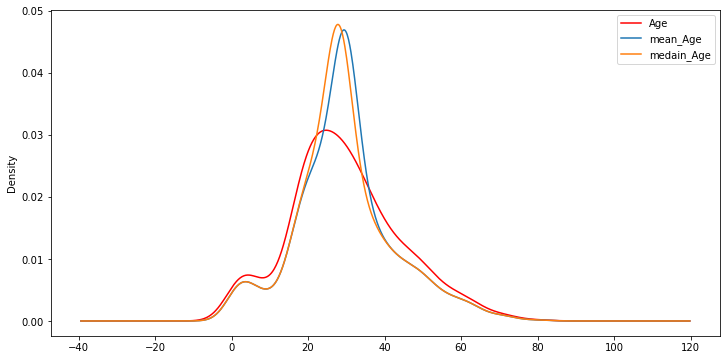

In [26]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

df['Age'].plot(kind = 'kde', color = 'red')
df['mean_Age'].plot(kind = 'kde')
df['medain_Age'].plot(kind = 'kde')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Here we can see that there is not much difference in the distribution so this means that we can use this 

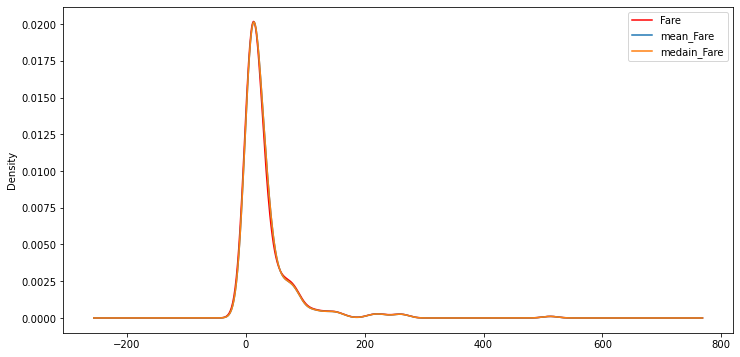

In [27]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

df['Fare'].plot(kind = 'kde', color = 'red')
df['mean_Fare'].plot(kind = 'kde')
df['medain_Fare'].plot(kind = 'kde')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Let's Check the covariance 
- the cov of age with fare and family
- the cov of mean age with fare and family

for fare, it values changes form 78 to 62

In [28]:
df.cov()

,Age,Fare,Family,Survived,mean_Age,medain_Age,mean_Fare,medain_Fare
Age,211.019125,78.071438,-6.507525,-0.551296,211.019125,211.019125,73.727862,73.727862
Fare,78.071438,2530.673077,17.460363,6.442361,62.210610,65.546143,2530.673077,2530.673077
Family,-6.507525,17.460363,2.603248,0.013063,-5.213332,-5.159658,16.577535,16.577535
Survived,-0.551296,6.442361,0.013063,0.236772,-0.441656,-0.411226,6.116624,6.116624
mean_Age,211.019125,62.210610,-5.213332,-0.441656,169.052400,169.052400,59.065130,59.065130
medain_Age,211.019125,65.546143,-5.159658,-0.411226,169.052400,169.512498,62.232012,62.232012
mean_Fare,73.727862,2530.673077,16.577535,6.116624,59.065130,62.232012,2402.717697,2402.717697
medain_Fare,73.727862,2530.673077,16.577535,6.116624,59.065130,62.232012,2402.717697,2402.717697


### Chech corr too 
- in case of corr we don't see much changes bcz the value is between 0 and 1

In [30]:
df.corr()

,Age,Fare,Family,Survived,mean_Age,medain_Age,mean_Fare,medain_Fare
Age,1.000000,0.099481,-0.301914,-0.077221,1.000000,1.000000,0.097273,0.097273
Fare,0.099481,1.000000,0.212626,0.263920,0.094681,0.099626,1.000000,1.000000
Family,-0.301914,0.212626,1.000000,0.016639,-0.248512,-0.245619,0.209609,0.209609
Survived,-0.077221,0.263920,0.016639,1.000000,-0.069809,-0.064910,0.256445,0.256445
mean_Age,1.000000,0.094681,-0.248512,-0.069809,1.000000,0.998642,0.092676,0.092676
medain_Age,1.000000,0.099626,-0.245619,-0.064910,0.998642,1.000000,0.097513,0.097513
mean_Fare,0.097273,1.000000,0.209609,0.256445,0.092676,0.097513,1.000000,1.000000
medain_Fare,0.097273,1.000000,0.209609,0.256445,0.092676,0.097513,1.000000,1.000000


### At the end we need to check for the outliers using box plot 

- outliers increase in case of means and mode but in real data we have less outliers

<AxesSubplot:>

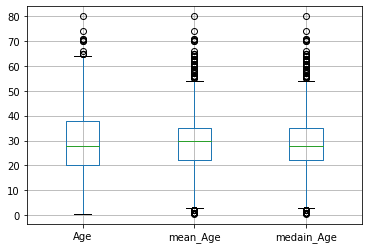

In [32]:
df[['Age', 'mean_Age', 'medain_Age']].boxplot()


### In case of fare, we almost got the same box plot 

<AxesSubplot:>

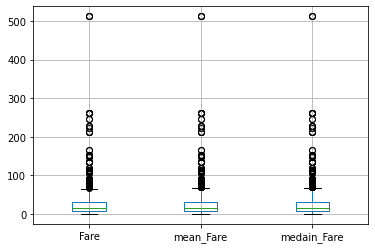

In [33]:
df[['Fare', 'mean_Fare', 'medain_Fare']].boxplot()